# SyncMCMC Tutorial

The following tutorial serves to illustrate proper implementation of SyncMCMC for inferring the flux normalization, self-absorption frequency, and characteristic electron frequency corresponding to synchrotron emission from a relativistic jet. These parameters, when combined with minimal energy equipartition arguments, allow for constraints on the total electron density and bulk Lortentz factor of the jet, as well as the minimum energy and physical source size.

In [4]:
%matplotlib inline
import sys
sys.path.append('/Users/Gandalf/SyncMCMC/syncmcmc')
from priorclasses import FluxFrequencyPriors, UniformPrior,FluxFrequencyPriorsCombinedSpectrum
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import emcee
import corner
import argparse
from PTmcmc import run_mcmc
sns.set_style("white")

SyncMCMC allows the user to input a number of parameters, such as lower and upper bounds for uniform priors on each parameter, and specify outputs, including corner plots and time series of the sampler chains. The data file must be specified when executing the script and should be titled accordingly (ie. "event_ndays") where ndays refers to the elapsed time since initial detection. 

       Usage: model.py [options] -i filename
    
       Outputs best fit parameters for F_v, v_a, and v_m and a plot of the fit.

       Options:

       -i     --input     Specify data file
       -r     --raw       Plot raw data
       -fp    --fprior    Speicify lower and upper bounds for prior on flux normalization factor (Default: 1:55)
       -vap   --vaprior   Specify lower and upper bounds for prior on self absorption frequency (Default 1E8:1E13)
       -vam   --vamprior  Specify lower and upper bounds for prior on characteristic frequency (Default 1E8:1E13)
       -lnfp  --lnfprior  Specify lower and upper bounds for prior on fractional amount by which variance is underestimated
       -t     --trace     Plot MCMC traces for F_v, v_a, v_m
       -c     --corner    Plot corner plots
       -F     --F_true    Specify true value for F_v
       -vat   --va_true   Specify true value for va
       -vmt   --vm_true   Specify true value for vm 

For example, the script can be called via:
    
        python ./model.py -i Sw1644+57_197days -t 
        
where the output will produce a plot of the best fit parameters as well as a time series of the sampler chains. 

The argument -r produces a plot of the raw data. 

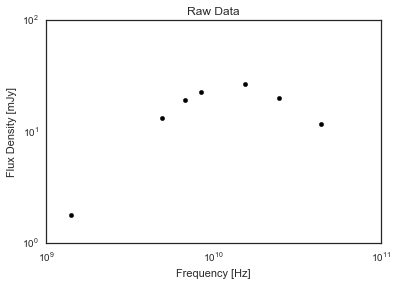

In [5]:
# Load data

flux = []
freqs = []
error = []

for line in open('syncmcmc/data/Sw1644+57_197days'):
   lines = line.strip()
   if not line.startswith("#"):
      columns = line.split(',')
      freqs.append(columns[0])
      flux.append(columns[1])
      error.append(columns[2].rstrip('\n'))

flux = np.array(flux).astype(float)
freqs = np.array(freqs).astype(float)
error = np.array(error).astype(float)

plt.scatter(freqs,flux,color='k')
plt.xscale('log')
plt.yscale('log')
plt.title('Raw Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Flux Density [mJy]')
plt.show()

The arguments -fp, -vap, and -vam specify the upper and lower bounds for priors on the flux normalization, self absorption frequency, and characteristic electron frequency respectively. As the frequencies are observable in the radio regime, 1 to a few hundred GHz are generally acceptable ranges. The flux normalization factor typically varies between 1 and 100 mJy. To pass these arguments:

        python ./model.py -i Sw1644+57_197days -fp 1 55 -vap 1E10 1E13 -vam 1E10 1E13
     
These arguments are optional. Default values are given by 1-55 for the flux and 1E8-1E13 for both break frequencies.